In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import read_txz as txz

In [3]:
basedir = 'compress'
all_fs = sorted(os.listdir(basedir))
#all_fs

In [4]:
group_fs = {}
for f in all_fs:
    ff = f.split('-')
    cat = ff[1]
    pset = ff[2].split('_')[-1]
    dn = ff[0].split('_')
    if len(dn)<4: 
        dd = 1
    else: 
        dd = int(float(dn[3]))
    #print(dd)
    #seed = ff[3].split('_')[2]
    if not(cat in group_fs): group_fs[cat] = {}
    if not(dd in group_fs[cat]): group_fs[cat][dd] = {}
    if not(pset in group_fs[cat][dd]): group_fs[cat][dd][pset] = []
    group_fs[cat][dd][pset].append(f)
    #print(seed)
    #break

In [5]:
group_fs.keys()

dict_keys(['couple_prob', 'divorce_prob', 'leaving_prob'])

In [6]:
group_fs['couple_prob'].keys()

dict_keys([1, 2, 3])

In [7]:
group_fs['couple_prob'][1].keys()

dict_keys(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

In [8]:
cat = 'couple_prob'
df_couple = {1:None, 2:None, 3:None}
for dlvl, probs in group_fs[cat].items():
    this_df = None
    #print(probs)
    for catp, v in probs.items():
        for f in v:
            fp = os.path.join(basedir, f)
            ff = f.split('-')
            seed = ff[3].split('_')[2]
            df = txz.read_df_from_txz(fp, 'stored_sex_age_stats.csv')
            df['detail_level'] = dlvl
            df[cat] = float(catp)
            df['seed'] = seed
            if this_df is None:
                this_df = df
            else:
                this_df = this_df.append(df)
            break
        break
    df_couple[dlvl] = this_df
    print(dlvl)
    break

1


In [9]:
df_couple[1].head()

,ind,time,age,male,female,detail_level,couple_prob,seed
0,0,0,0,24,23,1,0.0,s152745
1,1,0,1,133,128,1,0.0,s152745
2,2,0,2,142,134,1,0.0,s152745
3,3,0,3,125,148,1,0.0,s152745
4,4,0,4,150,132,1,0.0,s152745


In [10]:
df_couple[1]['both_age'] = df_couple[1]['male'] + df_couple[1]['female']
df_couple[1].head()

,ind,time,age,male,female,detail_level,couple_prob,seed,both_age
0,0,0,0,24,23,1,0.0,s152745,47
1,1,0,1,133,128,1,0.0,s152745,261
2,2,0,2,142,134,1,0.0,s152745,276
3,3,0,3,125,148,1,0.0,s152745,273
4,4,0,4,150,132,1,0.0,s152745,282


In [21]:
df_couple[1]['age_group'] = [ int(a/5)*5 for a in df_couple[1]['age'] ]
df_couple[1].head(10)

,ind,time,age,male,female,detail_level,couple_prob,seed,both_age,age_group
0,0,0,0,24,23,1,0.0,s152745,47,0
1,1,0,1,133,128,1,0.0,s152745,261,0
2,2,0,2,142,134,1,0.0,s152745,276,0
3,3,0,3,125,148,1,0.0,s152745,273,0
4,4,0,4,150,132,1,0.0,s152745,282,0
5,5,0,5,147,166,1,0.0,s152745,313,5
6,6,0,6,149,153,1,0.0,s152745,302,5
7,7,0,7,146,155,1,0.0,s152745,301,5
8,8,0,8,146,141,1,0.0,s152745,287,5
9,9,0,9,143,137,1,0.0,s152745,280,5


In [60]:
dfs2 = {}
dfs2[1] = pd.DataFrame(df_couple[1].groupby(['time', 'couple_prob', 'seed', 'age_group'])['both_age'].sum())
#print(type(dfs2[1]))
dfs2[1].head(40)

both_age
time couple_prob seed    age_group          
0    0.0         s152745 0              1139
                         5              1483
                         10             1520
                         15             1385
                         20              921
                         25              888
                         30              974
                         35             1074
                         40             1096
                         45              957
                         50             1279
                         55             1038
                         60              771
                         65              601
                         70              458
                         75              319
                         80              166
                         85              100
                         90               71
                         95               43
                         100               2
1    0.0         s152745 0               911
                         5              1485
                         10             1498
                         15             1422
                         20             1023
                         25              867
                         30              940
                         35             1074
                         40             1093
                         45              989
                         50             1210
                         55             1085
                         60              798
                         65              619
                         70              485
                         75              324
                         80              167
                         85               99
                         90               66

In [61]:
subtot = dfs2[1].groupby(['time', 'couple_prob', 'seed'])['both_age'].sum().to_dict()
subtot

{(0, 0.0, 's152745'): 16285,
 (1, 0.0, 's152745'): 16195,
 (2, 0.0, 's152745'): 16113,
 (3, 0.0, 's152745'): 16030,
 (4, 0.0, 's152745'): 15921,
 (5, 0.0, 's152745'): 15828,
 (6, 0.0, 's152745'): 15716,
 (7, 0.0, 's152745'): 15632,
 (8, 0.0, 's152745'): 15482,
 (9, 0.0, 's152745'): 15364,
 (10, 0.0, 's152745'): 15228,
 (11, 0.0, 's152745'): 15110,
 (12, 0.0, 's152745'): 14992,
 (13, 0.0, 's152745'): 14853,
 (14, 0.0, 's152745'): 14710,
 (15, 0.0, 's152745'): 14569,
 (16, 0.0, 's152745'): 14400,
 (17, 0.0, 's152745'): 14213,
 (18, 0.0, 's152745'): 14036,
 (19, 0.0, 's152745'): 13842,
 (20, 0.0, 's152745'): 13676}

In [62]:
subtot_col = []
for i in range(len(dfs2[1])):
    row = dfs2[1].iloc[i]
    time, couple_prob, seed, ag = row.name
    tot = subtot[(time, couple_prob, seed)]
    subtot_col.append(tot)
dfs2[1]['year_total'] = subtot_col

In [63]:
dfs2[1]['ag_prop'] = dfs2[1]['both_age'] / dfs2[1]['year_total']

In [64]:
dfs2[1].head()

both_age  year_total   ag_prop
time couple_prob seed    age_group                                
0    0.0         s152745 0              1139       16285  0.069942
                         5              1483       16285  0.091065
                         10             1520       16285  0.093337
                         15             1385       16285  0.085048
                         20              921       16285  0.056555

In [65]:
dfs2[1].reset_index(drop=False, inplace=True)
dfs2[1]

,time,couple_prob,seed,age_group,both_age,year_total,ag_prop
0,0,0.0,s152745,0,1139,16285,0.069942
1,0,0.0,s152745,5,1483,16285,0.091065
2,0,0.0,s152745,10,1520,16285,0.093337
3,0,0.0,s152745,15,1385,16285,0.085048
4,0,0.0,s152745,20,921,16285,0.056555
5,0,0.0,s152745,25,888,16285,0.054529
6,0,0.0,s152745,30,974,16285,0.059810
7,0,0.0,s152745,35,1074,16285,0.065950
8,0,0.0,s152745,40,1096,16285,0.067301
9,0,0.0,s152745,45,957,16285,0.058766


In [66]:
dfs2[1].groupby(['time', 'couple_prob', 'seed'])['ag_prop'].sum()

time  couple_prob  seed   
0     0.0          s152745    1.0
1     0.0          s152745    1.0
2     0.0          s152745    1.0
3     0.0          s152745    1.0
4     0.0          s152745    1.0
5     0.0          s152745    1.0
6     0.0          s152745    1.0
7     0.0          s152745    1.0
8     0.0          s152745    1.0
9     0.0          s152745    1.0
10    0.0          s152745    1.0
11    0.0          s152745    1.0
12    0.0          s152745    1.0
13    0.0          s152745    1.0
14    0.0          s152745    1.0
15    0.0          s152745    1.0
16    0.0          s152745    1.0
17    0.0          s152745    1.0
18    0.0          s152745    1.0
19    0.0          s152745    1.0
20    0.0          s152745    1.0
Name: ag_prop, dtype: float64

ValueError: Could not interpret input 'size_up'

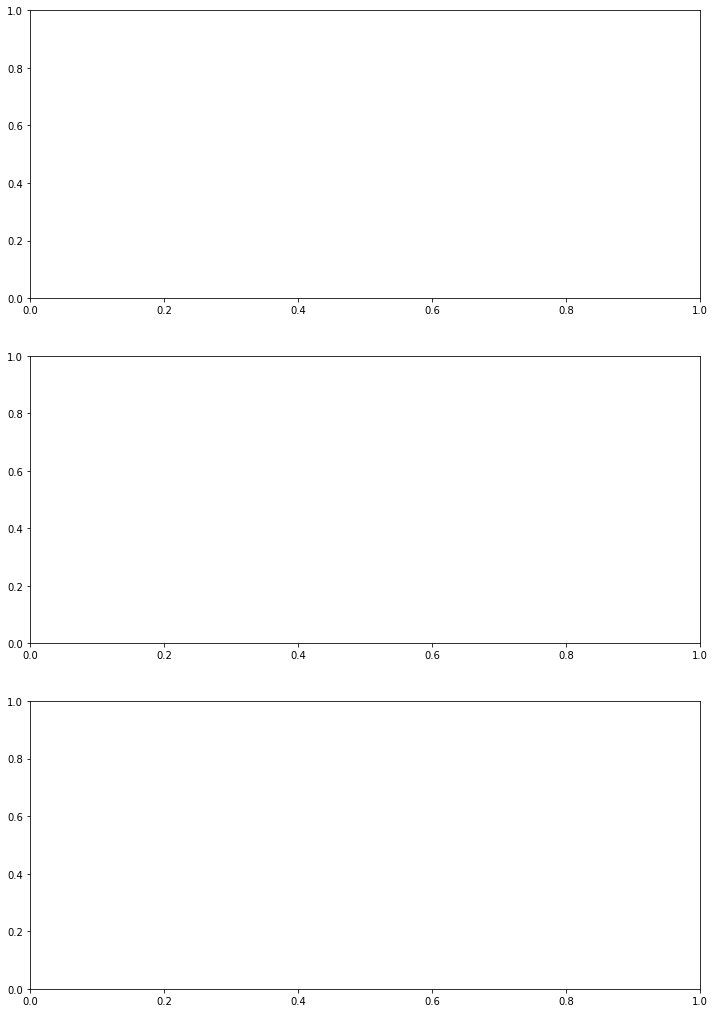

In [50]:
fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'size_up'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')

Text(0.0, 1.0, '(c) detail floating 3 digit, size_down')

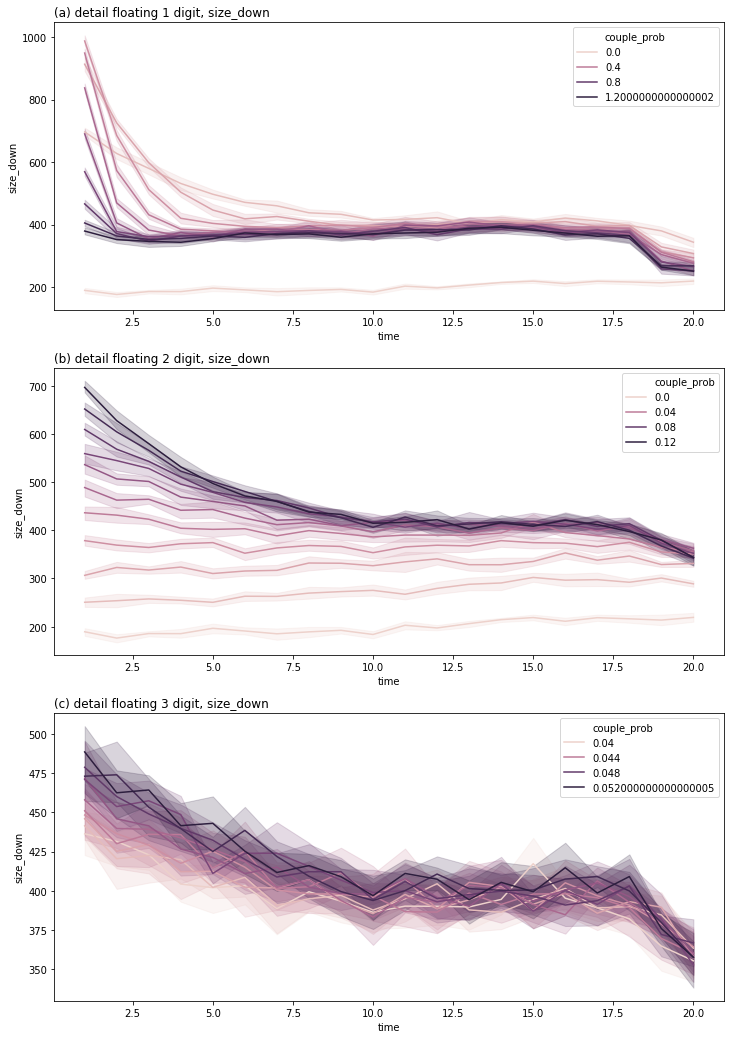

In [40]:
fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'size_down'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')

Text(0.0, 1.0, '(c) detail floating 3 digit, new_household')

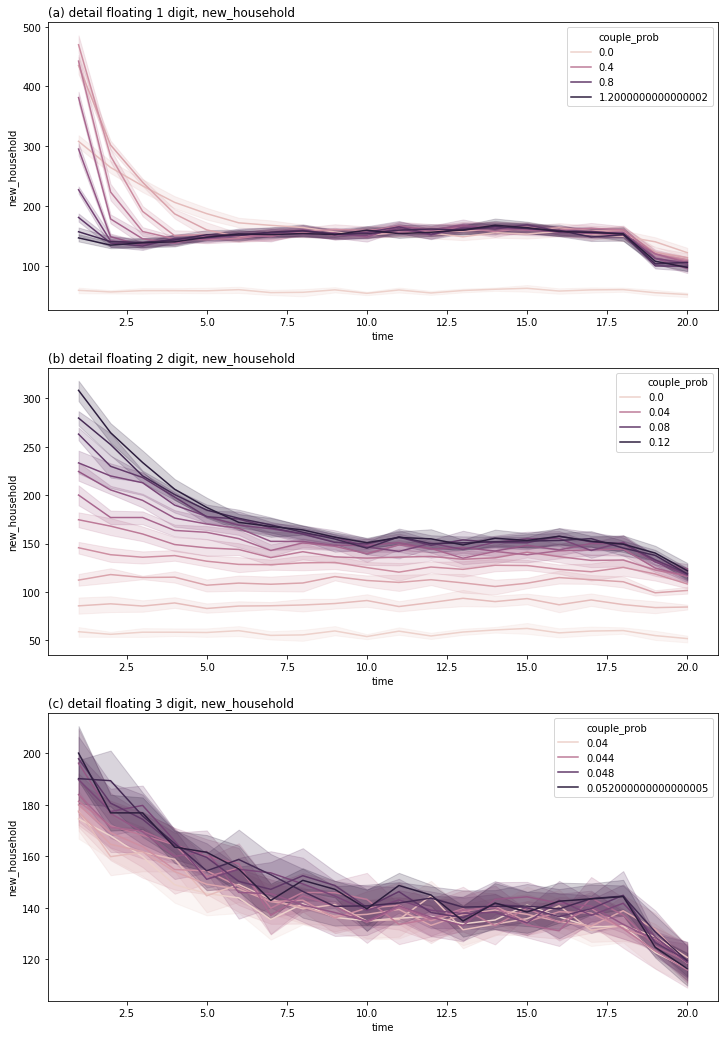

In [41]:
fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'new_household'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')

In [43]:
for dd, df in df_couple.items():
    df['total_changes'] = df['size_up']+df['size_down']+df['new_household']
    

Text(0.0, 1.0, '(c) detail floating 3 digit, total_changes')

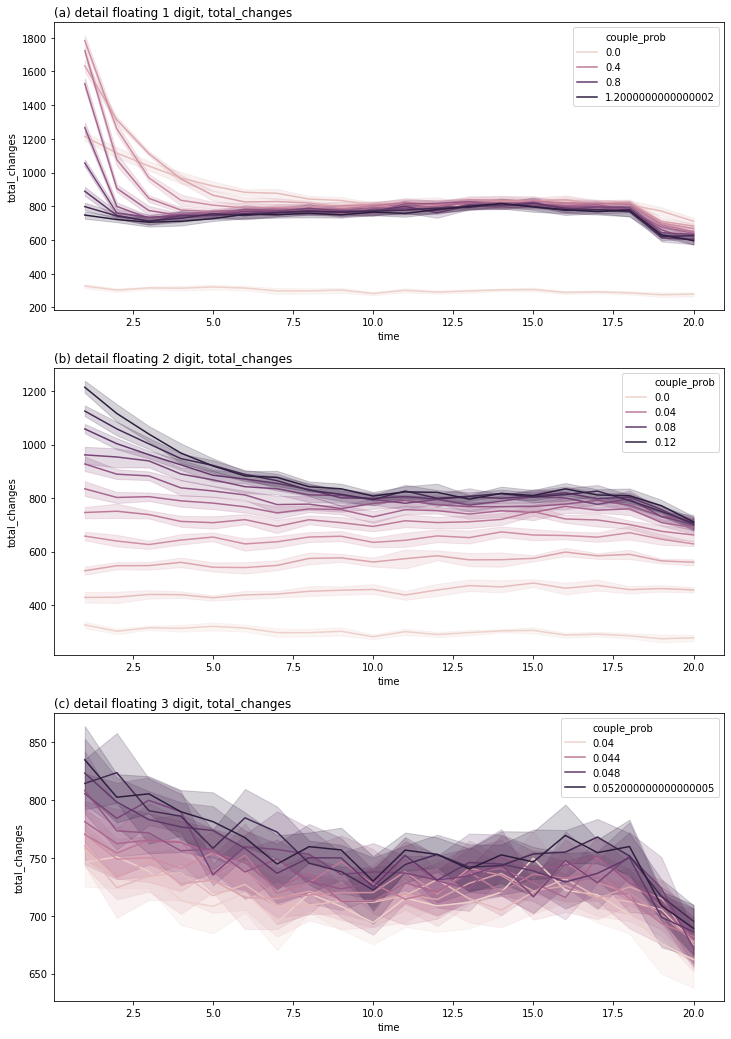

In [44]:


fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'total_changes'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')